# Customer Segmentation Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


# Finding null value in dataset

In [4]:
df.notnull().count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Finding the relation between two data

C:\Users\SUBHA DAS\Anaconda2\envs\myenv\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


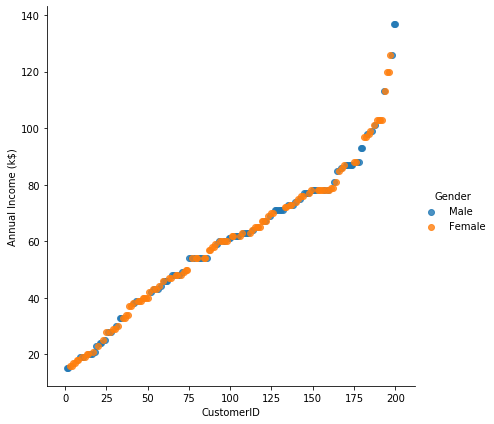

In [6]:
sns.lmplot('CustomerID','Annual Income (k$)',hue='Gender',data=df,size=6,fit_reg=False)

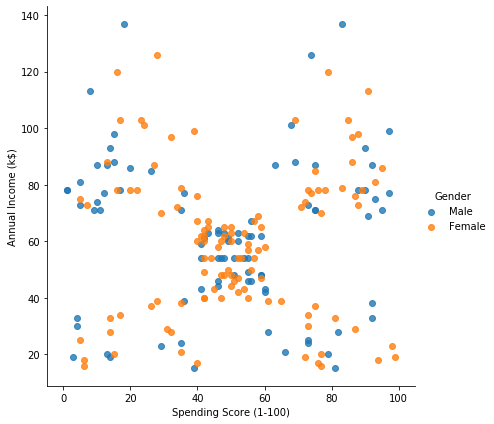

In [7]:
sns.lmplot('Spending Score (1-100)','Annual Income (k$)',hue='Gender',data=df,size=6,fit_reg=False)

In [8]:
df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


C:\Users\SUBHA DAS\Anaconda2\envs\myenv\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


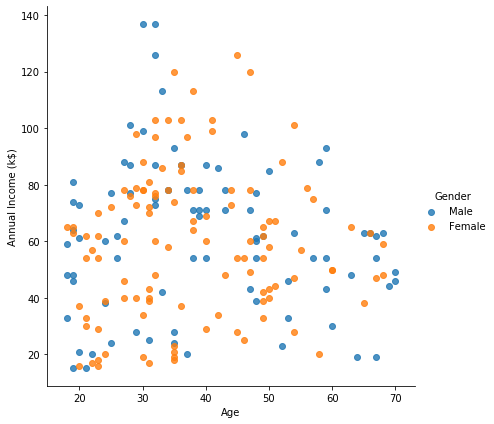

In [9]:
sns.lmplot('Age','Annual Income (k$)',hue='Gender',data=df,size=6,fit_reg=False)

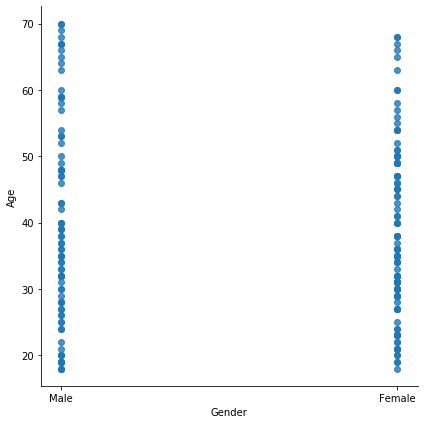

In [10]:
sns.lmplot('Gender','Age',data=df,size=6,fit_reg=False)

# Converted male into '1' and Female into '0'

In [11]:
r_d={'Female':0,'Male':1}
df['Gender']=df['Gender'].map(r_d)

In [12]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# Finding magnitude of the data

In [13]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


K-Means is a distance-based algorithm, this difference of magnitude can create a problem

# let’s first bring all the variables to the same magnitude:

In [19]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
dataScaled=Scaler.fit_transform(df)
pd.DataFrame(dataScaled).describe()

,0,1,2,3,4
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,0.000000,3.108624e-17,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.723412,-8.864053e-01,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-0.861706,-8.864053e-01,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,0.000000,-8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,0.861706,1.128152e+00,7.284319e-01,6.656748e-01,8.851316e-01
max,1.723412,1.128152e+00,2.235532e+00,2.917671e+00,1.894492e+00


# kMeans

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(dataScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans.inertia_

715.2750473761118

# Finding the best value of k

Text(0, 0.5, 'Inertia')

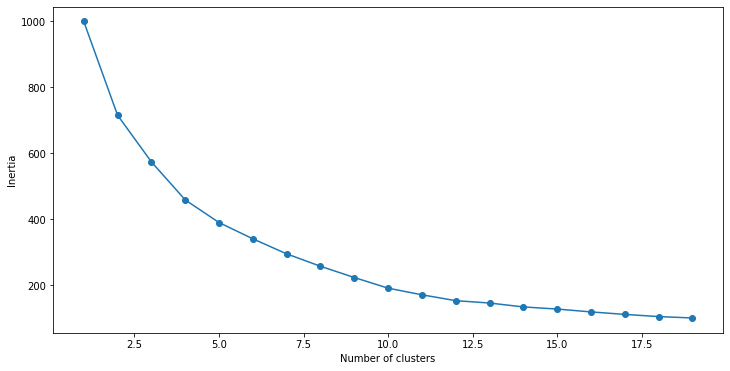

In [26]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(dataScaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

best value of k with in 7-10

In [29]:
kmeans = KMeans(n_jobs = -1, n_clusters = 7, init='k-means++')
kmeans.fit(dataScaled)
pred = kmeans.predict(dataScaled)

In [30]:
pred

array([5, 5, 1, 1, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 3, 5, 1, 5, 3, 1, 5, 5,
       4, 5, 4, 5, 4, 5, 4, 1, 3, 1, 3, 5, 4, 1, 4, 1, 4, 1, 4, 5, 3, 1,
       4, 1, 4, 1, 1, 1, 4, 5, 1, 3, 4, 3, 4, 3, 1, 3, 3, 5, 4, 4, 3, 5,
       4, 4, 5, 1, 3, 4, 4, 4, 3, 5, 4, 3, 1, 4, 3, 5, 3, 4, 1, 3, 4, 1,
       6, 4, 4, 5, 3, 4, 4, 5, 4, 6, 3, 5, 6, 4, 3, 5, 3, 6, 4, 3, 3, 3,
       3, 6, 4, 5, 6, 6, 4, 4, 4, 4, 2, 6, 6, 2, 6, 6, 0, 2, 3, 2, 0, 2,
       6, 6, 0, 6, 0, 2, 0, 6, 0, 2, 6, 6, 0, 2, 0, 6, 0, 2, 0, 2, 0, 6,
       0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 2, 0, 2, 0, 2, 0, 6,
       0, 2, 0, 2, 0, 6, 0, 6, 0, 2, 0, 2, 0, 6, 0, 6, 0, 6, 0, 6, 0, 2,
       0, 2])

In [32]:
frame = pd.DataFrame(dataScaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    38
0    34
6    33
3    28
1    26
5    22
2    19
Name: cluster, dtype: int64

In [33]:
kmeans = KMeans(n_jobs = -1, n_clusters = 8, init='k-means++')
kmeans.fit(dataScaled)
pred = kmeans.predict(dataScaled)

In [34]:
frame = pd.DataFrame(dataScaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    33
7    30
5    28
3    27
0    22
4    21
2    20
6    19
Name: cluster, dtype: int64

In [49]:
kmeans = KMeans(n_jobs = None, n_clusters = 7, init='k-means++')
kmeans.fit(dataScaled)
y2=kmeans.fit_predict(dataScaled)
df['label']=y2
pred = kmeans.predict(dataScaled)

# Here customer segmentation is done based on the similar types of data

In [50]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,4
1,2,1,21,15,81,4
2,3,0,20,16,6,5
3,4,0,23,16,77,5
4,5,0,31,17,40,5
5,6,0,22,17,76,5
6,7,0,35,18,6,5
7,8,0,23,18,94,5
8,9,1,64,19,3,3
9,10,0,30,19,72,5


In [51]:
frame = pd.DataFrame(dataScaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    39
5    36
2    34
3    27
4    23
6    21
0    20
Name: cluster, dtype: int64

In [52]:
cust1=df[df["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df[df["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df[df["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")
cust6=df[df["label"]==5]
print('Number of customer in 5th group=', len(cust6))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")
cust7=df[df["label"]==6]
print('Number of customer in 5th group=', len(cust7))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 2nd group= 34
They are - [ 13  23  25  27  29  35  37  41  45  47  51  55  57  63  64  67  68  72
  73  74  77  80  84  87  90  91  94  97 102 107 117 118 119 120]
--------------------------------------------
Number of customer in 3rd group= 20
They are - [127 129 131 135 139 145 147 151 157 159 163 165 167 171 173 177 179 183
 193 199]
--------------------------------------------
Number of customer in 4th group= 27
They are - [  9  11  15  19  31  33  43  54  56  58  60  61  65  71  75  78  81  83
  86  93  99 103 105 108 109 110 111]
--------------------------------------------
Number of customer in 5th group= 23
They are - [  1   2  16  18  21  22  24  26  28  34  42  52  62  66  69  76  82  92
  96 100 104 114 12

# Thank you!!